>[Задача на власні значення та вектори](#scrollTo=nEmhzK2qEjfJ)

>[Обчислення засобами numpy](#scrollTo=2m9CT639anc5)

>[Власний розклад](#scrollTo=1CyXDS2i1M7d)

>[Класифікація і кластеризація](#scrollTo=8Q9joMomz9yj)

>[Спектральна кластеризація](#scrollTo=BKaJjoR8JrDw)

>>>[Матриця суміжності](#scrollTo=nVZbwJBzXiK9)

>>>[Матриця ступенів](#scrollTo=ifiaojJgX98s)

>>>[Граф Лапласа](#scrollTo=iHgXCVHiYVrj)

>>>[Власні значення лапласіана графа](#scrollTo=_8AUzXOHYs36)

>>[Спектральна кластеризація довільних даних](#scrollTo=39fmnp08dOwF)

>>>>[Граф найближчих сусідів](#scrollTo=SPlD9j3MTbfo)

>[Реалізація засобами бібліотеки Sklearn](#scrollTo=Fd0ql5HzDBzI)

>[Confusion Matrix](#scrollTo=VFiyjTnoLr6J)

>[Бібліотека Sklearn](#scrollTo=W7J6GANkSnO-)



# Задача на власні значення та вектори

Розглянемо більш детально визначення, що таке власні значення та вектори.

Для квадратної матриці $A$ та вектора $X$ (який є не нульовим), вектор $X$ називається **власним вектором матриці** $A$, а число $λ$ називається **власним значенням** матриці $A$, якщо виконується таке відношення:

$ AX = λX$

Тобто, добуток матриці $A$ на власний вектор $X$ дає результат, який є добутком власного значення $λ$ на цей вектор.


#Обчислення засобами numpy

Розглянемо приклад обчислення власних значень.



In [1]:
import numpy as np
from numpy import linalg as LA

input = np.array([[2,2],[8,2]])

eig_val, eig_vect = LA.eig(input)

Власні значення

In [2]:
eig_val

array([ 6., -2.])

Власні вектори

In [3]:
eig_vect

array([[ 0.4472136 , -0.4472136 ],
       [ 0.89442719,  0.89442719]])

In [4]:
eig_vect[:,0]

array([0.4472136 , 0.89442719])

2й власний вектор

In [5]:
eig_vect[:,1]

array([-0.4472136 ,  0.89442719])

# Власний розклад


Приклад з використанням Numpy наведено нижче.

У цьому коді ми спочатку створюємо довільну квадратну матрицю A. Потім ми знаходимо власні значення та власні вектори за допомогою функції np.linalg.eig().

Після цього ми виводимо початкову матрицю A, власні значення та власні вектори.

Далі ми перевіряємо коректність розкладання, перемножаючи власні вектори, діагональну матрицю власних значень та обернену матрицю власних векторів. Результат має співпадати з початковою матрицею A.

In [7]:
import numpy as np

# Створимо довільну квадратну матрицю
A = np.array([[2, 2, 1],
              [4, 2, 1],
              [10, 20, 30]])

# Знайдемо власні значення та власні вектори матриці A
eig_vals, eig_vects = np.linalg.eig(A)


print(f"Matrix A:\n {A}")


print("\nВласні значення:\n", eig_vals)
print("\nВласні вектори:\n", eig_vects)

print("\nВласні вектори(round):\n", np.round(eig_vects, 2).T)

print(f"\nDiagional matrix from eigenvals:\n {np.diag(eig_vals)}")
print(f"\nInverse eigenvects matrix:\n {np.linalg.inv(eig_vects)}")

# Перевіримо розклад, підставивши власні значення та власні вектори в початкову матрицю
recon_matrix = eig_vects.dot(np.diag(eig_vals)).dot(np.linalg.inv(eig_vects))

print("\nРеконструйована матриця:")
print(recon_matrix)


Matrix A:
 [[ 2  2  1]
 [ 4  2  1]
 [10 20 30]]

Власні значення:
 [31.15741477  3.56317959 -0.72059436]

Власні вектори:
 [[ 0.03694337  0.41276469  0.45445712]
 [ 0.03931477  0.64444804 -0.80688253]
 [ 0.99854371 -0.64367074  0.37737159]]

Власні вектори(round):
 [[ 0.04  0.04  1.  ]
 [ 0.41  0.64 -0.64]
 [ 0.45 -0.81  0.38]]

Diagional matrix from eigenvals:
 [[31.15741477  0.          0.        ]
 [ 0.          3.56317959  0.        ]
 [ 0.          0.         -0.72059436]]

Inverse eigenvects matrix:
 [[ 0.42302775  0.68666905  0.95877194]
 [ 1.25687948  0.67375245 -0.07302814]
 [ 1.0244673  -0.66776178 -0.01161128]]

Реконструйована матриця:
[[ 2.  2.  1.]
 [ 4.  2.  1.]
 [10. 20. 30.]]


# Класифікація і кластеризація

Класифікація і кластеризація - це дві різні задачі машинного навчання, які використовуються для різних цілей і мають різні методи та підходи.

1. **Класифікація**

   - **Ціль**. Класифікація полягає в призначенні кожному об'єкту з вхідного набору даних однієї або більше категорій або міток на основі його характеристик.
   
   - **Навчання з учителем**. Це завдання навчання з учителем, оскільки для класифікації потрібно мати набір даних, у якому кожен приклад має відому категорію або мітку.
      

2. **Кластеризація**

   - **Ціль**. Кластеризація полягає у групуванні схожих об'єктів у вхідному наборі даних таким чином, щоб об'єкти в межах кожного кластера були більш подібними один до одного, ніж до об'єктів в інших кластерах.
   
   - **Навчання без учителя**. Це завдання навчання без учителя, оскільки вихідні дані не мають категорій або міток, і модель повинна самостійно знаходити структуру даних.
   

Отже, основна відмінність між класифікацією і кластеризацією полягає у тому, що класифікація використовує відомі мітки для навчання моделі, тоді як кластеризація не використовує міток і спробує знайти природні групи у невідомих даних.

### Спектральна кластеризація


Розглянемо далі як власні значення та вектори використовуються у спектральній кластеризації для графів та інших даних.

Кластеризація є одним із головних завдань неконтрольованого машинного навчання. Мета полягає в тому, щоб розподілити дані без поміток у кластери (групи). В кожному кластері розташовуються схожі за певним критерієм дані.

Спектральна кластеризація — це техніка, яка бере свій початок у теорії графів, де цей підхід використовується для ідентифікації груп вузлів у графі на основі ребер, що їх з’єднують. Цей метод є гнучким і дозволяє також кластеризувати неграфічні дані.

Спектральна кластеризація використовує інформацію з власних значень (спектру) спеціальних матриць, побудованих із графа або набору даних. Ми навчимося будувати ці матриці, інтерпретувати їхній спектр і використовувати власні вектори для призначення наших даних кластерам.

## Основні етапи


1. Попередня обробка (pre-processing):
  1. побудова матриці-репрезентації графа;

2. Декомпозиція (decomposition):
  1. обчислення власних векторів і власних значень матриці;
  2. відображення кожної точки у просторі меншої розмірності на базі одного, або більше вдасних векторів;

3. Групування (grouping):
  1. Призначення точок до двох, або більше кластерів, грунтуючись на їх представленні у новій розмірності.

Але спершу давайте софрмулюємо проблему.

## Розбиття графу

Нехай задано неорієнтований граф 𝐺(𝑉,𝐸), де $V$ - набір вершин, а $E$ - набір дуг:

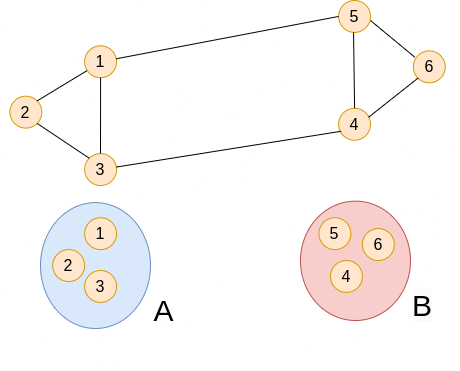

Розбиття на два кластери здійснюється шляхом розділення вершини на дві непересічні групи 𝐴, 𝐵. Власне, тепер виникає два питання:
1. Як визначити "правильне" розбиття графу 𝐺?
2. Як ефективно реалізувати таке розбиття?

Що таке "правильне" розбиття?

*   Максимізувати кількість зв'язків в середині кластера (групи)
*   Мінімізувати кількість зв'язків між кластерами (групами)


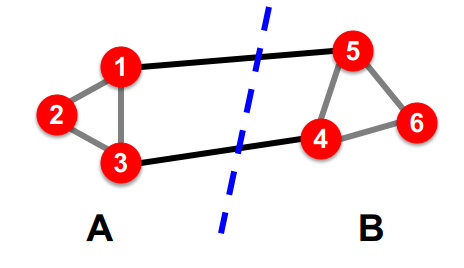

Ми можеми виразити мету розбиття як функцію "розрізу ребер".
**Розріз**: набір ребер з одною кінцівкою у кожній групі.

$cut(A, B) = \sum_{i \in A, j \in B} [\omega_{i, j}] $.

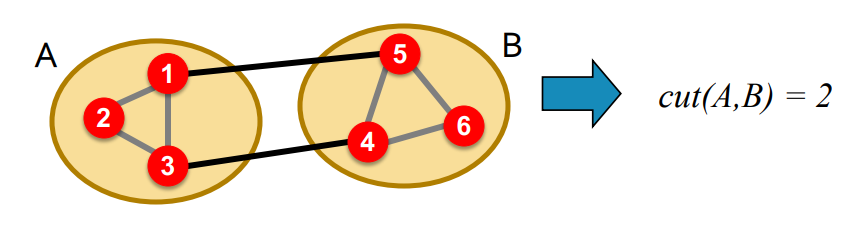

Наприклад, критерієм такого розрізу може бути мнімізація ваги з'єднань між групами:

$\underset{A,B}{\arg\min} \, \text{cut}(A,B)$.

Проте, тоді можливий такий випадок, який призводить до некоректного розділення графа.

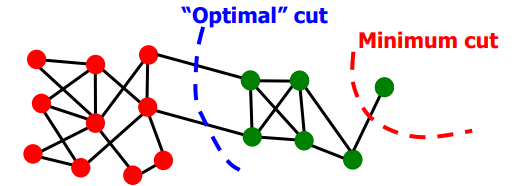

Проблемами такого критерію є:

1. Розглядає тільки зовнішні з'єднання кластера;
2. Не враховує внутрішню зв'язність кластера.

## Критерій: Провідність
Зв'язність між групами відносно щільності кожної групи

$
\phi(A, B) = \frac{\text{cut}(A, B)}{\min(\text{vol}(A), \text{vol}(B))}
$

- $
vol(S): \text{загальний зважений ступінь вузлів у } S:
$

- $
vol(S) = \sum_{u \in S} d_u \text{ (кількість кінцевих точок ребер у } S)
$

**Чому використовувати цей критерій?**
- Створює більш збалансовані розбиття

**Як ефективно знайти хороше розбиття?**
Проблема: Обчислення найкращого розрізу провідності є NP-складною задачею.

**Звідки походить назва "спектральна кластеризація"?**

* Теорія спектра графа аналізує "спектр" матриці, що представляє граф.
* Спектр: Власні вектори $x_i$ графа, впорядковані за величиною (магнітудою) їхніх відповідних власних значень $λ_i$.

## Матричне представлення

Матриця суміжності $A$ для графа 𝐺:

* матриця розмірності $ n \times n $;
* $ A = [a_{ij}] $, $ a_{ij} = 1 $ якщо є ребро між вузлом $ i $ та $ j $.

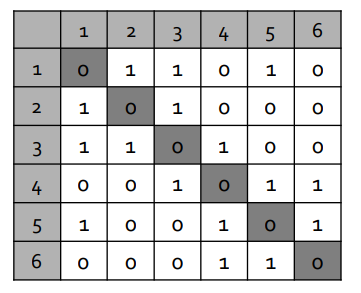

Важливі властивості:

1. Симетрична матриця

2. Має $ n $ дійсних власних значень
3. Власні вектори мають дійсні значення і є ортогональними.



Матриця ступенів (D):
* діагональна матриця розмірності $ n \times n $;
* $ D = [d_{ii}] $, $ d_{ii} $ = ступінь вузла $ i $.


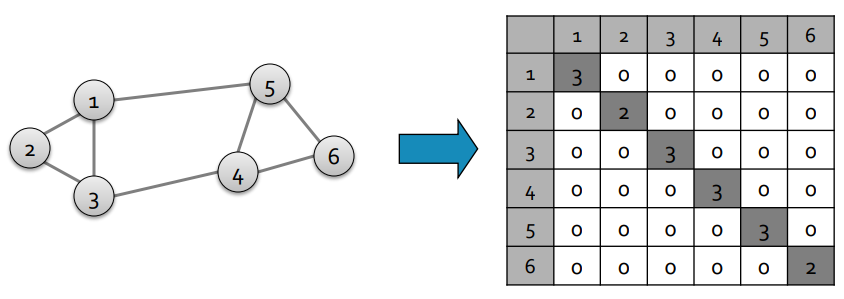

Матриця Лапласа $L$ для графа 𝐺:

$ L = D -A$.

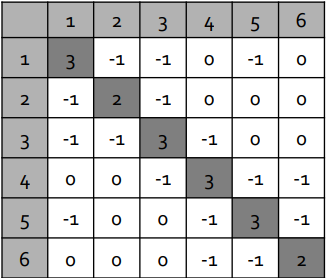

## Власні вектори і власні значення у спектральній кластеризації

Як можна помітити, у матриці Лапласа, сума елементів по кожному рядку і стовпчику рівна нулю. Можемо тут використати аналогію потоку, розглядаємо $ D $ як потік в вершину, та $ A $ як потік з вершини. Вода продовжує текти, тому вона ніде не затримується. Тобто, стільки ж, скільки притікає, стільки ж і витікає.

Існує (зазвичай) кілька власних векторів  $ L $ (Лапласіана). Наприклад, розглянемо набір власних векторів і власних значень деякого графа, які відсортовані за $ \lambda $.

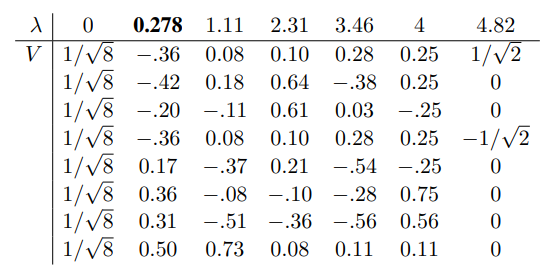

Перше власне значення завжди дорівнює 0, а перший власний вектор завжди дорівнює $ \frac{1}{\sqrt{|V|}} $ в кожному елементі.
Другий власний вектор (вектор Фідлера) є дуже важливим описом графа. У прикладі це $ \mathbf{x}_2 = (-0.36, -0.42, -0.20, -0.36, 0.17, 0.36, 0.31, 0.50) $, як вказано у другому стовпці наведеної вище таблиці.

Це підказує нам, як найкраще розрізати граф, а саме
* показує, як "найкраще" розташувати всі вершини на одній лінії;
* ми можемо встановити $ A = \{v_i \in V \mid u_2(v_i) < 0\} $ та $ B = V \setminus A $;
* іноді можна зробити краще, перевіряючи всі можливі розрізи уздовж $ v_2 $ (використовуючи будь-який поріг, а не лише 0). Вибераємо той, який має найкращий $\phi(A, B)$.




**Коли використовувати вектор Фідлера?**

1. У випадку двох кластерів:

  * Вектор Фідлера особливо корисний для розбиття графа на два кластери. Це пов’язано з тим, що значення компонент цього вектора можна інтерпретувати як міру зв'язаності вузлів графа.
  * Відсортувавши вершини за значеннями другого власного вектора, ми можемо знайти природний розріз графа, поділивши вершини на дві групи.
2. Збалансоване розбиття:

  * Вектор Фідлера допомагає знайти збалансовані розбиття, де кластери мають приблизно однаковий розмір. Це досягається за рахунок використання середнього або медіанного значення для розрізу.
3. Попередня обробка для подальшого кластеризації:

Вектор Фідлера можна використовувати як основу для подальших алгоритмів кластеризації, таких як алгоритм k-means, щоб розбити граф на більше ніж два кластери.

**Коли не використовувати:**

1. Більше ніж два кластери:

  * Якщо мета полягає в тому, щоб розбити граф на більше ніж два кластери, одного вектора Фідлера може бути недостатньо. У цьому випадку корисніше використовувати більше власних векторів (наприклад, перші k власних векторів) для побудови багатовимірного простору, в якому можна застосувати алгоритми кластеризації, такі як k-means.

2. Великі графи:

  * Для дуже великих графів обчислення другого власного вектора може бути дорогим за часом і ресурсами. У таких випадках варто розглянути інші методи кластеризації або апроксимації.
3. Відсутність чітких кластерів:

  * Якщо граф не має чітко вираженої кластерної структури, використання вектора Фідлера може не дати значущих результатів. У цьому випадку можуть бути потрібні інші методи аналізу графів або попереднє оброблення даних для виявлення потенційних кластерів.

**Пояснення для випадку з двома кластерами**

У випадку двох кластерів використання вектора Фідлера є найпростішим і найбільш ефективним. Це пов'язано з тим, що другий власний вектор відображає інформацію про найбільш слабко зв'язані компоненти графа. Значення цього вектора для кожної вершини можна використовувати для розбиття графа:

1. Сортування значень:

  * Вершини сортуються за значеннями другого власного вектора.

2. Розріз за середнім або медіанним значенням:

  * Вершини діляться на дві групи в залежності від того, чи їх значення другого власного вектора більше або менше деякого порогу (наприклад, нуль або медіанне значення).
3. Формування кластерів:

  * Це розбиття визначає два кластери, які максимально розділені з точки зору провідності або іншої міри зв'язаності.

Важливі властивості $ L $:
* Власні значення - невід'ємні дійсні числа
* Власні вектори є дійсними (і завжди ортогональними).


Тепер, на основі матриці Лапласа означемо кроки спектральної кластеризації.

1. **Попередня обробка**: побудова матриці Лапласіана $ L $ графа $ G$.


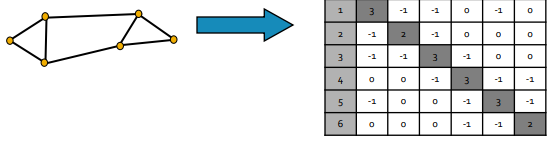

2. **Декомпозиція**: знайти власні значення $ \lambda $ і власні вектори $ \mathbf{x} $.


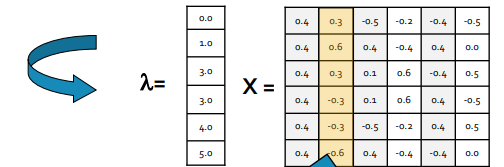

Відобразити вершини на відповідні компоненти $ \mathbf{x}_2 $.

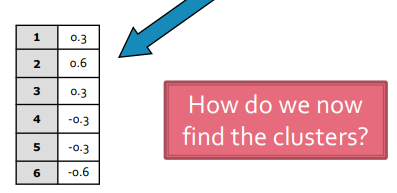

3. **Групування**:
* Відсортувати компоненти зменшеного одномірного вектора;
* Визначити кластери, розділивши відсортований вектор на дві частини.


Як вибрати точку розділу?
* Наївні підходи:
  * Розділити по 0 або по медіанному значенні.
* Складніші підходи:
  *  *Спроба мінімізувати нормалізований розріз в одновимірному просторі (перебір упорядкування вузлів на основі значень власного вектора)*.

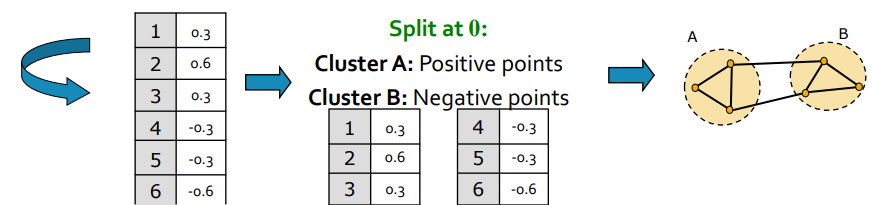

**Кілька прикладів розбиттів**

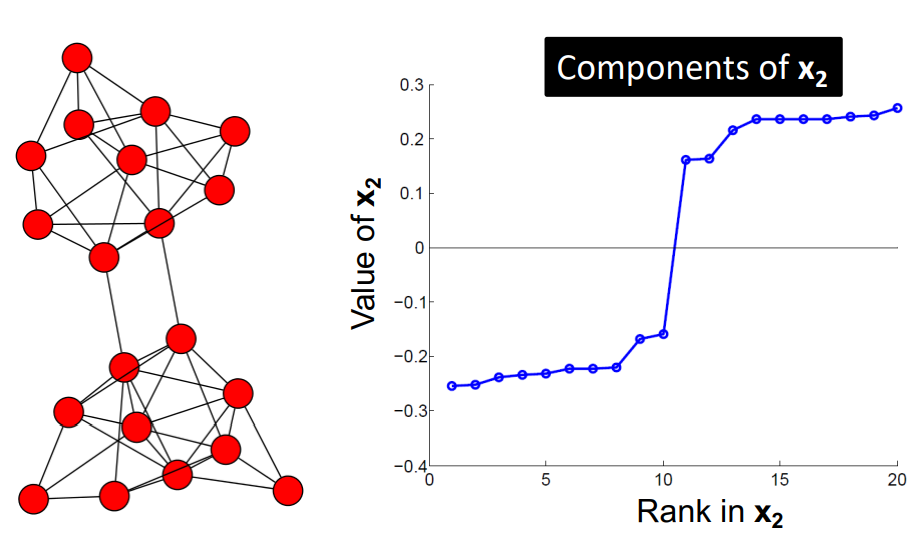

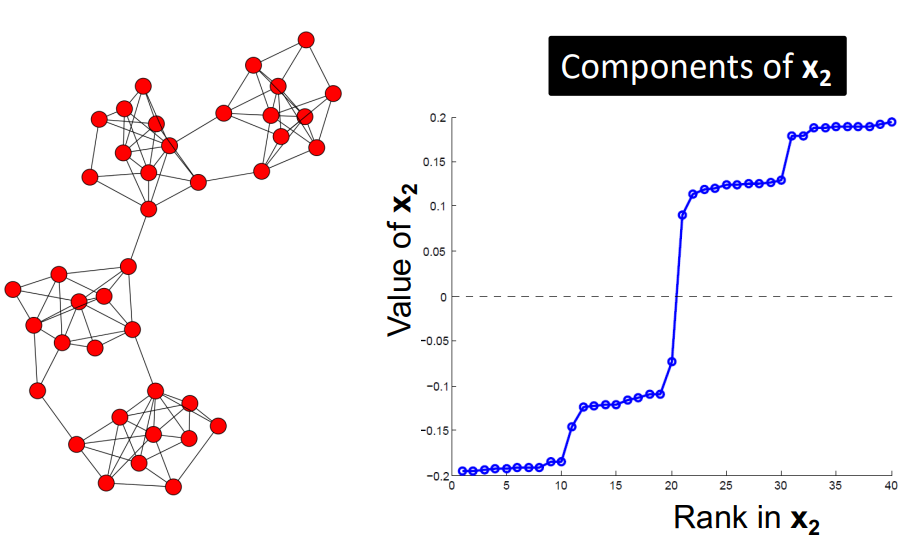

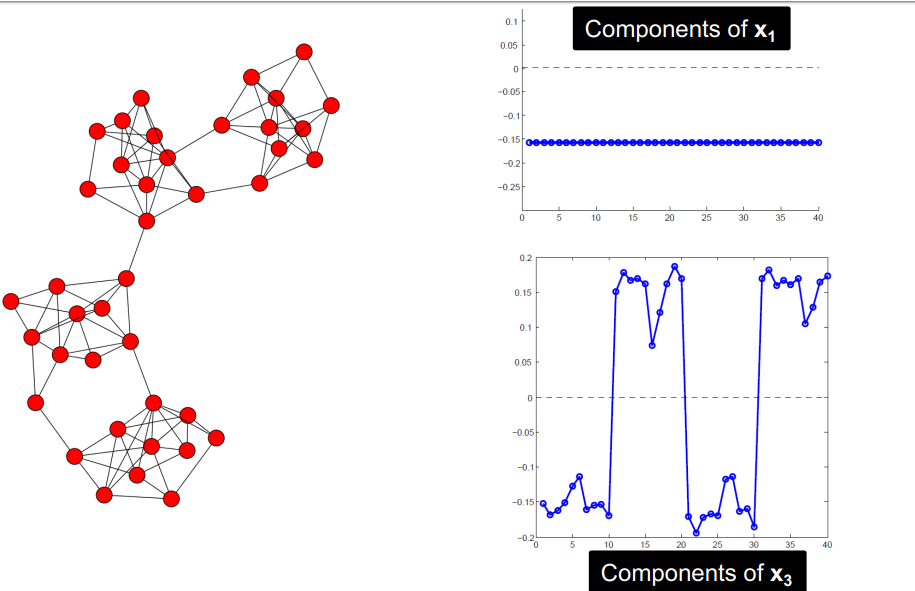

## Як розбити граф на k кластерів?

Існує два основних підходи:

* Рекурсивний бісекційний поділ [Hagen et al., '92]
  * Рекурсивно застосовується алгоритм бісекційного поділу в ієрархічному розподільчому порядку;
  * Недоліки: неефективний, нестабільний.
* Кластеризація декількох власних векторів [Shi-Malik, '00]
  * Створюється зменшений простір із декількох власних векторів
    * Тепер кожен вузол представлено k числами;
    * Потім ми кластеризуємо (застосовуємо k-means) вузли на основі їхнього k-вимірного подання.
  * Часто використовується в останніх роботах.

Тепер перейдемо до деяких практичних аспектів алгоритму.

## Як обрати k?

Розрив між власними значеннями (власні значення просортовані в порядку спадання):
* Різниця між двома послідовними власними значеннями.
* Найстабільніше кластерування зазвичай дається значенням  $ k $, яке максимізує розрив $ \delta_k = |\lambda_{k+1} - \lambda_k| $.

Приклад:

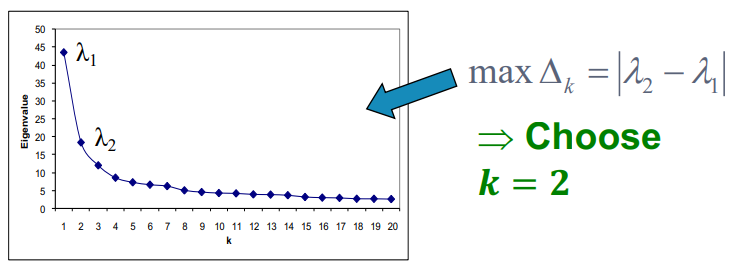

Розглянемо далі як власні значення та вектори використовуються у спектральній кластеризації для графів та інших даних.

**Наведені числові приклади є ілюстративними. Мета - проілюструвати використання власних значень та векторів у методах кластеризації. Результати програмної реалізації наведених прикладів можуть відрізнятись від результатів бібліотечних методів.**

***Графи*** є природним способом представлення багатьох типів даних. Граф — це набір вузлів із відповідним набором ребер, які з’єднують вузли. Ребра можуть бути спрямованими або неорієнтованими і навіть мати пов’язані з ними ваги.

Наприклад, мережу маршрутизаторів в Інтернеті можна легко представити у вигляді графа. Маршрутизатори — це вузли, а ребра — це з’єднання між парами маршрутизаторів. Деякі маршрутизатори можуть пропускати трафік лише в одному напрямку, тому ребра можуть бути спрямовані, щоб показати, у якому напрямку може передаватись трафік. Ваги на ребрах можуть представляти пропускну здатність, доступну вздовж цього ребра. За допомогою цього підходу можна аналізувати граф, щоб знайти ефективні шляхи для передачі даних від одного маршрутизатора до іншого в мережі.

Розглянемо такий граф

![picture](https://drive.google.com/uc?id=1UhQqFwdH3YhESVEs-qpdNcgRLKva5-8R)

Цей граф має 10 вузлів і 12 ребер. Він також має два зв’язані компоненти {0,1,2,8,9} і {3,4,5,6,7}. Зв’язний компонент — це максимальний підграф вузлів, усі з яких мають шляхи до решти вузлів у підграфі.










###Матриця суміжності

Ми можемо представити наш приклад графа як матрицю суміжності, де індекси рядків і стовпців представляють вузли, а записи представляють відсутність або наявність ребра між вузлами. Матриця суміжності для нашого прикладу графіка виглядає так:

In [16]:
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

У матриці ми бачимо, що рядок 0, стовпець 1 має значення 1. Це означає, що існує ребро, яке з’єднує вузол 0 із вузлом 1. Якби ребра були зважені, ваги ребер увійшли б у цю матрицю замість лише 1 і 0. Оскільки наш графік неорієнтований, записи для рядка $i$, стовпець $j$ будуть дорівнювати запису в рядку $j$, стовпець $i$. Останнє, на що слід звернути увагу, це те, що діагональ цієї матриці дорівнює 0, оскільки жоден із наших вузлів не має ребер сам по собі.



###Матриця ступенів


Ступінь вузла - це те, скільки ребер з'єднується з ним. У орієнтованому графі ми могли б говорити про вхідний ступінь і вихідний ступінь, але в цьому прикладі ми маємо лише ступінь, оскільки ребра йдуть в обидві сторони. Дивлячись на наш графік, ми бачимо, що вузол 0 має ступінь 4, оскільки він має 4 ребра. Ми також можемо отримати ступінь, взявши суму рядка вузла в матриці суміжності.

Матриця ступенів — це діагональна матриця, де значення на вході $(i, i)$ є ступенем вузла i. Давайте знайдемо матрицю ступенів для нашого прикладу:




In [9]:
D = np.diag(A.sum(axis=1))
print(D)

# [[4 0 0 0 0 0 0 0 0 0]
#  [0 2 0 0 0 0 0 0 0 0]
#  [0 0 2 0 0 0 0 0 0 0]
#  [0 0 0 2 0 0 0 0 0 0]
#  [0 0 0 0 2 0 0 0 0 0]
#  [0 0 0 0 0 4 0 0 0 0]
#  [0 0 0 0 0 0 2 0 0 0]
#  [0 0 0 0 0 0 0 2 0 0]
#  [0 0 0 0 0 0 0 0 2 0]
#  [0 0 0 0 0 0 0 0 0 2]]

[[4 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


Спочатку ми взяли суму по осі 1 (рядки) нашої матриці суміжності, а потім помістили ці значення в діагональну матрицю. З матриці ступенів ми можемо легко побачити, що вузли 0 і 5 мають 4 ребра, тоді як решта вузлів мають лише 2.

###Граф Лапласа

Тепер ми обчислимо лапласіан графіка. Лапласіан — це ще одне матричне представлення графа. Він має кілька властивостей, які використовуються для спектральної кластеризації. Щоб обчислити нормальний лапласіан (є кілька варіантів), ми просто віднімаємо матрицю суміжності з нашої матриці ступенів:

In [12]:
L = D-A
print(L)

# [[ 4 -1 -1  0  0  0  0  0 -1 -1]
#  [-1  2 -1  0  0  0  0  0  0  0]
#  [-1 -1  2  0  0  0  0  0  0  0]
#  [ 0  0  0  2 -1 -1  0  0  0  0]
#  [ 0  0  0 -1  2 -1  0  0  0  0]
#  [ 0  0  0 -1 -1  4 -1 -1  0  0]
#  [ 0  0  0  0  0 -1  2 -1  0  0]
#  [ 0  0  0  0  0 -1 -1  2  0  0]
#  [-1  0  0  0  0  0  0  0  2 -1]
#  [-1  0  0  0  0  0  0  0 -1  2]]

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


Діагональ Лапласа - це ступінь наших вузлів, а недіагональ - це від'ємні ваги ребер. Це представлення, яке ми шукаємо для виконання спектральної кластеризації.

###Власні значення лапласіана графа

Розглянемо декілька граничних випадків

![picture](https://drive.google.com/uc?id=16A_vJsHRFoluel7CrrarlWuvaS05FGyr)

Коли граф повністю роз’єднаний, усі десять власних значень дорівнюють 0. Коли ми додаємо ребра, деякі з власних значень збільшуються. Фактично кількість 0 власних значень відповідає кількості зв’язних компонент у нашому графі!

Розглянемо зв'язний граф.

![picture](https://drive.google.com/uc?id=1j040w3Mc_8g_58av0Jrkzpmmg-8aY1jt)

*Перше власне значення* дорівнює 0, оскільки ми маємо лише одну зв’язну компоненту (весь граф зв’язаний). Відповідний власний вектор завжди матиме постійні значення (у цьому прикладі всі значення близькі до 0,32).

*Перше ненульове власне* значення називається спектральною щілиною. Спектральна щілина дає нам певне уявлення про щільність графіка. Якби цей граф був щільно зв’язаним (усі пари з 10 вузлів мали ребро), то спектральний розрив дорівнював би 10.

*Друге власне значення* називається значенням Фідлера, а відповідний вектор — вектором Фідлера. Значення Фідлера приблизно дорівнює мінімальному розрізу графа, необхідному для розділення графа на дві зв’язані компоненти. Якби граф уже складався з двох зв’язаних компонентів, тоді значення Фідлера було б 0. Кожне значення у векторі Фідлера дає інформацію про те, до якої сторони розрізу належить даний вузол. Давайте розфарбуємо вузли залежно від того, чи є їх запис у векторі Філдера позитивним чи ні:

![picture](https://drive.google.com/uc?id=1_Zmkw60kosP6Q7BRPRvJJk9LvRTbNZh5)

Отже, врахування знаку другого власного значення дає змогу сегментувати граф на два кластери.

*Наступні два власних значення* також досить малі. Це говорить нам про те, що «близько» є чотири окремі з’єднані компоненти. Загалом, ми часто шукаємо перший великий розрив між власними значеннями, щоб знайти кількість кластерів, виражених у наших даних. В цьому прикладі такий розрив є між власними значеннями чотири та п’ять.

Наявність чотирьох власних значень перед проміжком вказує на наявність чотирьох кластерів. Вектори, пов’язані з першими трьома додатними власними значеннями, повинні дати нам інформацію про те, які три розрізи потрібно зробити на графіку, щоб призначити кожен вузол одному з чотирьох апроксимованих компонентів. Давайте побудуємо матрицю з цих трьох векторів і виконаємо кластеризацію K-Means, щоб визначити мітки:













In [15]:
from sklearn.cluster import KMeans

# our adjacency matrix
print("Adjacency Matrix:")
print(A)

# Adjacency Matrix:
# [[0. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
#  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
#  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
#  [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
#  [1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

# diagonal matrix
D = np.diag(A.sum(axis=1))

# graph laplacian
L = D-A

# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=4)
kmeans.fit(vecs[:,1:4])
colors = kmeans.labels_

print("Clusters:", colors)

# Clusters: [2 1 1 0 0 0 3 3 2 2]


Adjacency Matrix:
[[0 1 1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0]]
Clusters: [3 3 3 2 2 2 0 0 1 1]


Граф сегментовано на чотири квадранти з вузлами 0 і 5, довільно призначеними одному з їхніх зв’язаних квадрантів.

![picture](https://drive.google.com/uc?id=1ttlKHzNz4hHnm4sQIyFC7wyDiRfjg84G)

Підводячи підсумок, ми спочатку взяли наш графік і побудували матрицю суміжності. Потім ми створили лапласіан графіка, віднімаючи матрицю суміжності з матриці ступенів. Власні значення лапласіана показали, що було чотири кластери. Вектори, пов’язані з цими власними значеннями, містять інформацію про те, як сегментувати вузли. Нарешті, ми виконали K-Means для цих векторів, щоб отримати мітки для вузлів. Далі ми побачимо, як це зробити для довільних даних.



##Спектральна кластеризація довільних даних

Розглянемо далі набір даних, який не задається безпосередньо графом. Для ускладнення задачі кластеризації згенеруємо за допомогою функцї make_circles() наступну задачу:


In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Генеруємо дані за допомогою make_circles.
# Випробуємо різні значення параметра factor
X, y = make_circles(n_samples=100, noise=0.05, factor = 0.1, random_state=42)
# X, y = make_circles(n_samples=100, noise=0.05, factor = 0.3, random_state=42)
# X, y = make_circles(n_samples=100, noise=0.05, factor = 0.5, random_state=42)
# X, y = make_circles(n_samples=100, noise=0.05, factor = 0.7, random_state=42)
# X, y = make_circles(n_samples=100, noise=0.05, factor = 0.9, random_state=42)

# Візуалізація згенерованих даних з додаванням порядкового номера
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color='red' if y[i] == 0 else 'blue', marker='o' if y[i] == 0 else 'x', label='Клас 0' if y[i] == 0 else 'Клас 1')
    plt.text(point[0], point[1], str(i), fontsize=8)

plt.title('Генерація даних з make_circles')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
# plt.legend(loc='upper right')
plt.show()


### Граф найближчих сусідів

Є кілька способів отримати з чисельних даних граф. Найпростіший спосіб — побудувати k-граф найближчих сусідів (функція kneighbors_graph() з sklearn).

Граф k-найближчих сусідів розглядає кожну точку даних як вузол на графіку. Потім від кожного вузла до k його найближчих сусідів у вихідному просторі проводиться ребро. Зазвичай, алгоритм не надто чутливий до вибору k. Менші числа, наприклад 5 або 10, зазвичай працюють досить добре.

Нехай кожна кожна точка на зображені набору даних Circle пов’язана з 5 найближчими сусідами. Будь-яка точка зовнішнього кільця повинна мати можливість йти по шляху вздовж кільця, але не буде шляхів у внутрішнє коло. Досить легко побачити, що цей граф матиме дві пов’язані компоненти: зовнішнє кільце та внутрішнє коло.

Виконаємо аналогічні перетворення:

- Обчислимо матрицю графа $A$.
- Розрахуємо матрицю ступенів $D$.
- Обчислимо матрицю Лапласа $L$.
- Для матриці $L$ обчислимо власні значення та вектори.
- Розділимо дані на кластери відповідно до знака 2го власного вектора.

Розглянемо програмну реалізацію цього підходу.








Побудуємо граф kNN-G (k-Nearest Neighbor Graph) - граф, у  якому кожна вершина поєднана з її k найближчими сусідами

In [ ]:
from sklearn.datasets import make_circles
import numpy as np
from scipy.spatial.distance import euclidean

# Функція для обчислення відстані між двома точками у просторі ознак
def distance(point1, point2):
    # Реалізуйте необхідну метрику відстані, наприклад, евклідова відстань

    dist = euclidean(point1, point2)
    return dist

# Функція для побудови графа kNN-G
def build_knn_graph(data, k):
    graph = {}  # Ініціалізація порожнього графа

    # Шаг 2: Додавання вершин
    for i, point1 in enumerate(data):
        graph[i] = set()  # Додаємо вершину у граф

    # Шаг 3:  Обчислення відстаней та побудова ребер
    for i, point1 in enumerate(data):
        distances = []  # Список для зберігання відстаней до всіх інших вершин
        for j, point2 in enumerate(data):
            if i != j:   # Виключаємо відстань до самої себе
                dist = distance(point1, point2)
                distances.append((j, dist))  # Зберігаємо індекс вершини та відстань до неї
                # print(distances)
        # breakpoint()
        # Сортуємо список відстаней та додаємо k найближчих сусідів у граф
        distances.sort(key=lambda x: x[1])  # Сортуємо за відстанню
        for neighbor_index, _ in distances[:k]:
            graph[i].add(neighbor_index)  # Додаємо ребро до найближчих сусідів

    return graph

In [ ]:
# Приклад побудови графа
# дані - набір даних (масив точок у просторі ознак)
# k - кількість найближчих сусідів
knn_graph = build_knn_graph(X, 10)


З візуалізацією графів засобами бібліотеки `networkx` ви могли стикатись у курсі Математика.

Додаток:
[Альтернативна візуалізація з plotly (інтерактивний графік)](#scrollTo=Vu-6nv5v-sHa)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Заданий граф у форматі словника
graph = knn_graph

# Створення графу з використанням NetworkX
G = nx.Graph(graph)

# Візуалізація графу
nx.draw(G, with_labels=True, node_color='skyblue', node_size=100, font_size=8, font_weight='bold')
plt.title('Граф')
plt.show()



Побудуємо матрицю суміжності для отриманого графа

In [ ]:
# Визначаємо кількість вузлів у графі
num_nodes = len(graph)

# Ініціалізуємо матрицю суміжності з нулями розміром num_nodes x num_nodes
adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]

# Заповнюємо матрицю суміжності
for node, neighbours in graph.items():
    for neighbour in neighbours:
        adjacency_matrix[node][neighbour] = 1
print(adjacency_matrix)
# adjacency_matrix



Використаємо бібліотеку sklearn та отримаємо матрицю суміжності функцією kneighbors_graph()

(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)

In [ ]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, n_neighbors=20).toarray()

Порівняємо обидві матриці суміжності для того, щоб преконатись у правильності реалізації без використання бібліотеки sklearn

In [ ]:
# Порівняння матриць
if np.array_equal(adjacency_matrix, A):
    print("Матриці однакові")
else:
    print("Матриці різні")

Розрахуємо лапласіан та його власний розклад

In [ ]:
# передбачувана кількість кластерів
k = 2
# create the graph laplacian
D = np.diag(A.sum(axis=1))
L = D-A

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)
vals = np.real_if_close(vals, tol=1)
vecs = np.real_if_close(vecs, tol=1)
# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# Вибірка перших k власних векторів
U = vecs[:,0:k]
U

Використання методу кластерізації з бібліотеки sklearn - KMeans(**буде детально розглядатись в темі 4**)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
clusters_labels = kmeans.fit_predict(U)
clusters_labels


In [ ]:
# Візуалізація згенерованих даних з додаванням порядкового номера
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color='red' if clusters_labels[i] == 0 else 'blue', marker='o' if clusters_labels[i] == 0 else 'x', label='Клас 0' if clusters_labels[i] == 0 else 'Клас 1')
    plt.text(point[0], point[1], str(i), fontsize=8)

plt.title('Розподіл даних з за кластерами')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
# plt.legend(loc='upper right')
plt.show()


#Реалізація засобами бібліотеки Sklearn

Програмна реалізація спектральної кластеризації
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html):

https://github.com/scikit-learn/scikit-learn/blob/f07e0138b/sklearn/cluster/_spectral.py#L379

Використовує функцію spectral_embedding для власного розкладу лапласіана

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html




In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', random_state=0).fit(X)
sk_clusters_labels = clustering.labels_

In [ ]:
# Візуалізація згенерованих даних з додаванням порядкового номера
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color='red'
                if sk_clusters_labels[i] == 0 else 'blue', marker='o'
                if sk_clusters_labels[i] == 0 else 'x', label='Клас 0'
                if sk_clusters_labels[i] == 0 else 'Клас 1')
    plt.text(point[0], point[1], str(i), fontsize=8)

plt.title('Розподіл даних з за кластерами')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
# plt.legend(loc='upper right')
plt.show()


#Confusion Matrix

Матриця помилок, або Confusion Matrix, є інструментом для оцінки якості роботи моделі класифікації, зокрема у машинному навчанні. Вона дозволяє візуалізувати те, наскільки добре модель класифікує екземпляри кожного класу, і виявляти плутанину між класами.

Confusion Matrix має чотири основних елементи:

1. **True Positives (TP)**. Кількість прикладів, які модель правильно класифікувала як позитивні.

2. **True Negatives (TN)**. Кількість прикладів, які модель правильно класифікувала як негативні.

3. **False Positives (FP)**. Кількість прикладів, які модель неправильно класифікувала як позитивні (тип помилки І типу).

4. **False Negatives (FN)**. Кількість прикладів, які модель неправильно класифікувала як негативні (тип помилки II типу).

Confusion Matrix візуалізується у вигляді таблиці з двома рядками і двома стовпцями (для бінарних класифікаторів). У заголовках рядків та стовпців зазвичай розміщуються фактичні та передбачені мітки класів відповідно.

```
                 Predicted Negative    Predicted Positive
Actual Negative          TN                    FP
Actual Positive          FN                    TP
```

Confusion Matrix допомагає зрозуміти, де саме модель допускає помилки та як ці помилки впливають на її загальну ефективність. Вона є потужним інструментом для аналізу роботи класифікаційних моделей.

Використаємо Confusion Matrix для того щоб проілюструвати помилки кластеризації

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, clusters_labels)

Оскільки мітки кластерів можуть не співпадати з мітками класів, необхідно аналізувати матрицю більш уважно.

## Поясненя на прикладі

Візьмем матрицю:
```
[[49  1  0]
 [ 0 47  3]
 [ 0 18 32]]
```
### Пояснення:
- **Кількість класів:** У нас є 3 класи. Нехай вони будуть позначені як клас 0, клас 1, і клас 2.
#### Рядок 1 (Клас 0):
- **49:** Правильно класифіковані об'єкти як клас 0.
- **1:** Неправильно класифіковані як клас 1.
- **0:** Неправильно класифіковані як клас 2.
#### Рядок 2 (Клас 1):
- **0:** Неправильно класифіковані як клас 0.
- **47:** Правильно класифіковані як клас 1.
- **3:** Неправильно класифіковані як клас 2.
#### Рядок 3 (Клас 2):
- **0:** Неправильно класифіковані як клас 0.
- **18:** Неправильно класифіковані як клас 1.
- **32:** Правильно класифіковані як клас 2.
### Короткий підсумок:
- **Клас 0:** 49 правильно, 1 неправильно як клас 1, 0 неправильно як клас 2.
- **Клас 1:** 47 правильно, 0 неправильно як клас 0, 3 неправильно як клас 2.
- **Клас 2:** 32 правильно, 0 неправильно як клас 0, 18 неправильно як клас 1.
### Основні висновки:
1. **Клас 0:** Класифікується з високою точністю (49 з 50 випадків правильні).
2. **Клас 1:** Також класифікується з високою точністю (47 з 50 випадків правильні), але є деякі плутанини з класом 2 (3 випадки).
3. **Клас 2:** Має найбільшу кількість помилок класифікації, зокрема, багато з них неправильно відносяться до класу 1 (18 випадків).

### Загальний висновок
Ця конфузійна матриця показує, що модель добре справляється з класифікацією класів 0 та 1, але плутає клас 2 з класом 1 у значній кількості випадків. Це може свідчити про те, що модель потребує вдосконалення для кращої класифікації класу 2.








#Бібліотека Sklearn

scikit-learn, також відома як sklearn, є однією з найпопулярніших бібліотек машинного навчання для Python. Вона надає широкий спектр алгоритмів для класифікації, регресії, кластеризації, вимірювання показників ефективності та інших завдань машинного навчання.

В цьому курсі ми будемо використовувати деякі функції цієї бібліотеки для ілюстрації тих математичних алгоритмів та понять, що будуть розглядатися в курсі. Більш повноцінне знайомство з бібліотекою буде на курсі Машинне навчання.



Робота з вбудованими наборами даних для тестування різних методів прогнозування та обробки даних.

Завантаження даних

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_targets = iris_data.target
iris_data = iris_data.data

In [ ]:
from sklearn.datasets import load_wine

# Завантаження даних
data_wine = load_wine()
data = data_wine.data
targets = data_wine.target
# Виведення опису даних
print(data_wine.DESCR)

# Виведення ознак
print("Ознаки (features):", data_wine.feature_names)

# Виведення цільових міток
print("Мітки (target):", data_wine.target_names)

# Виведення розмірності даних
print("Розмірність даних:", data_wine.data.shape)


Створення набору даних для подальшої обробки та візуалізації

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns=data_wine.feature_names)
df['target'] = targets
df

Кількість спостережень на клас

In [ ]:
df.target.value_counts()

Статистичні характеристики ознак

In [ ]:
df.describe()

Вибірка ознак

In [ ]:
df = df[['alcohol', 'flavanoids', 'proline', 'target']]

Візуалізація. Точкова діаграма ScatterPlot

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='target', palette= "tab10", diag_kind='hist')

Виділення ознак окремо для подальшої обробки

In [ ]:
features = df.iloc[:, :-1]
features.head()

Стандартизація даних

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

In [ ]:
df_scaled = pd.DataFrame(scaled, columns=features.columns)
df_scaled.head()

Після цих етапів, зазвичай, дані вважаються підготовленими для методів кластеризації, класифікації, регресії

# Додаток ▶️

In [ ]:
!pip install pyvis -q

## Альтернативна візуалізація з plotly (інтерактивний графік)

### Circle

In [ ]:
from sklearn.datasets import make_circles
import plotly.graph_objects as go

# Генеруємо дані за допомогою make_circles.
# Випробуємо різні значення параметра factor
X, y = make_circles(n_samples=100, noise=0.05, factor=0.1, random_state=42)

# Створення слів для класів
class0_x = []
class0_y = []
class1_x = []
class1_y = []

for i, point in enumerate(X):
    if y[i] == 0:
        class0_x.append(point[0])
        class0_y.append(point[1])
    else:
        class1_x.append(point[0])
        class1_y.append(point[1])

# Візуалізація даних
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=class0_x,
    y=class0_y,
    mode='markers',
    marker=dict(
        color='red',
        symbol='circle',
        size=10,
    ),
    name='Клас 0'
))

fig.add_trace(go.Scatter(
    x=class1_x,
    y=class1_y,
    mode='markers',
    marker=dict(
        color='blue',
        symbol='x',
        size=10,
    ),
    name='Клас 1'
))

fig.update_layout(
    title='Генерація даних з make_circles',
    xaxis_title='Ознака 1',
    yaxis_title='Ознака 2',
)

fig.show()


### Graph

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Заданий граф у форматі словника
graph = knn_graph

# Створення графу з використанням NetworkX
G = nx.Graph(graph)

# Отримання позицій вершин для візуалізації
pos = nx.spring_layout(G)

# Створення списків з координатами вершин
node_x = []
node_y = []
for key in pos:
    x, y = pos[key]
    node_x.append(x)
    node_y.append(y)

# Створення списку з координатами ребер
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Створення слів вершин
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Додавання тексту до вершин
node_text = [f'Node: {key}<br>Connections: {len(list(G.neighbors(key)))}' for key in pos.keys()]
node_trace.text = node_text

# Створення слів ребер
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

# Створення фігури графа
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Граф',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text="",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002)],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Відображення графа
fig.show()


### Wine

In [ ]:
import plotly.express as px

# Візуалізація графіку парних змінних
fig = px.scatter_matrix(df, color='target', title='Wine Dataset',
                         width=1000, height=1000, color_continuous_scale='agsunset')
fig.show()


## Додаткові матеріали

1. Getting Started with Spectral Clustering - https://juanitorduz.github.io/spectral_clustering/
2. Spectral Clustering. Theory and Implementation - https://gjkoplik.github.io/spectral_clustering/
3. Spectral Clustering - Detailed Explanation - https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation
4. A Tutorial on Spectral Clustering (Hardcore, but useful math) - https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf
5. Spectral clustering of graphs - https://drive.google.com/file/d/1vlAXpb8Fxzr8EgQnuDiJk6x2K0pgQ2Lf/view?usp=sharing